## Executive Summary:

This report is about predicting "ISBOUND" for car insurance, which means the person who asked for the car insurance quote took out the insurance policy. To predict the prices two data sets were used, one is Cooperators_Quotes_Dataset_Training.xlsx and another one is Cooperators_Quotes_Dataset_Testing.xlsx.

Imagine you have a dataset of car insurance policy information such as car model, maker, driver name, occupation, ownership type, etc., and you want to predict if the person can get insurance for their car. The goal is to build a model that makes accurate predictions considering the core features as the maximum potential of information.

Here's what the code does:

It starts by loading the insurance policy information data and finding the major features undergoing different steps of data pre-processing such as finding columns that have missing values and replacing those applying mean and mode methods, mapping mismatched vehicle data, mapping qualitative categorical data to numerical data, etc.

Then, it splits the data into two parts: the "training" set and the "validation" set. The training set teaches the model how to make predictions, and the validation set is used to check how well the model is doing.

In this code, two different methods were used for predicting the outcome. One is the Naive Bayes method and another is the Logistic Regression.

It trains the model using the training data, so the model learns from the features of the insurance data and their actual "ISBOUND" values.

After training, the model makes predictions on the validation set and calculates how accurate those predictions are. For both methods Receiver operating characteristic Curve (ROC) and Area under the ROC Curve (AUC) were calculated and plotted in the graph.

Finally, the roc curve for both Logistic Regression and the Naive Bayes method were compared to check the better result.

Final Result:
Naive Bayes:

    AUC = 0.5024
  
    Accuracy = 78%

Logistic Regression:

    AUC = 0.50
  
    Accuracy = 78%

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Data Pre-Processing:

At first, a train data set for predicting "ISBOUND" was loaded using Pandas DataFrame in a two-dimensional tabular data structure.

In the first step of data pre-processing, a chart to check the data type and the number of non-missing values in each column of the training data set was charted using the info() method. Then the describe() method shows the statistical summary of the training data. Then the data with date format was converted to integer format and any object type data that included numbers was converted to string.

The columns with numerical features are shown for visualization using histogram plots.

Afterward, the checkNull() function was used to find the columns with the missing and Not-a-Number (NaN) values of the training dataset as a series object with your missing data counts.

In the next step, the missing values were replaced. For that two techniques were used as the categorical features were divided into two parts, numerical and qualitative:

         i. The mean of all values of a particular feature was assigned for the missing values in the case of numerical data using the fillNa() method. VEHICLE_VALUE, COMMUTE_DISTANCE, ANNUAL_KM, etc. are such features
        
        ii. A similar method was used for qualitative data like VEHICLE_OWNERSHIP, OCCUPATION, etc to fill the missing values using the mode of that feature set. The non-numerical categorical data were mapped to numerical data using the LabelEncoder() classes_ function that labels data as integers depending on the labels.
        
A secondary column VEHICLEMAKE_NEW was used to map all the mismatched vehicle name and was reassigned in VEHICLEMAKE column.

Likewise, the test data was loaded and processed as well.

There was a mismatch in the column names in the train and test dataset. So, the column names were modified using the replace() method to match with the test dataset.

In the last step of pre-processing, the training dataset was extracted into features (df_train_data_X) and target (df_train_data_y) sets. Again, the test dataset extracted the features (df_test_data).

In [2]:
df =  pd.read_excel('Cooperators_Quotes_Dataset_Training.xlsx')

In [3]:
df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101891 entries, 0 to 101890
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   QUOTEDATE                       101891 non-null  datetime64[ns]
 1   VEHICLEYEAR                     101891 non-null  int64         
 2   VEHICLEMAKE                     101891 non-null  object        
 3   VEHICLEMODEL                    101891 non-null  object        
 4   ANNUAL_KM                       101890 non-null  float64       
 5   COMMUTE_DISTANCE                66478 non-null   float64       
 6   MARKING_SYSTEM                  25 non-null      object        
 7   TRACKING_SYSTEM                 4 non-null       object        
 8   VEHICLE_OWNERSHIP               25441 non-null   object        
 9   VEHICLE_VALUE                   37218 non-null   float64       
 10  VEHICLEUSE                      101891 non-null  object 

In [5]:
df['QUOTEDATE'] = pd.to_numeric(df['QUOTEDATE'])
df['VEHICLEMAKE'] = df['VEHICLEMAKE'].astype(str)
df['VEHICLEMODEL'] = df['VEHICLEMODEL'].astype(str)

Text(0.5, 1.02, 'Histograms of numerical features')

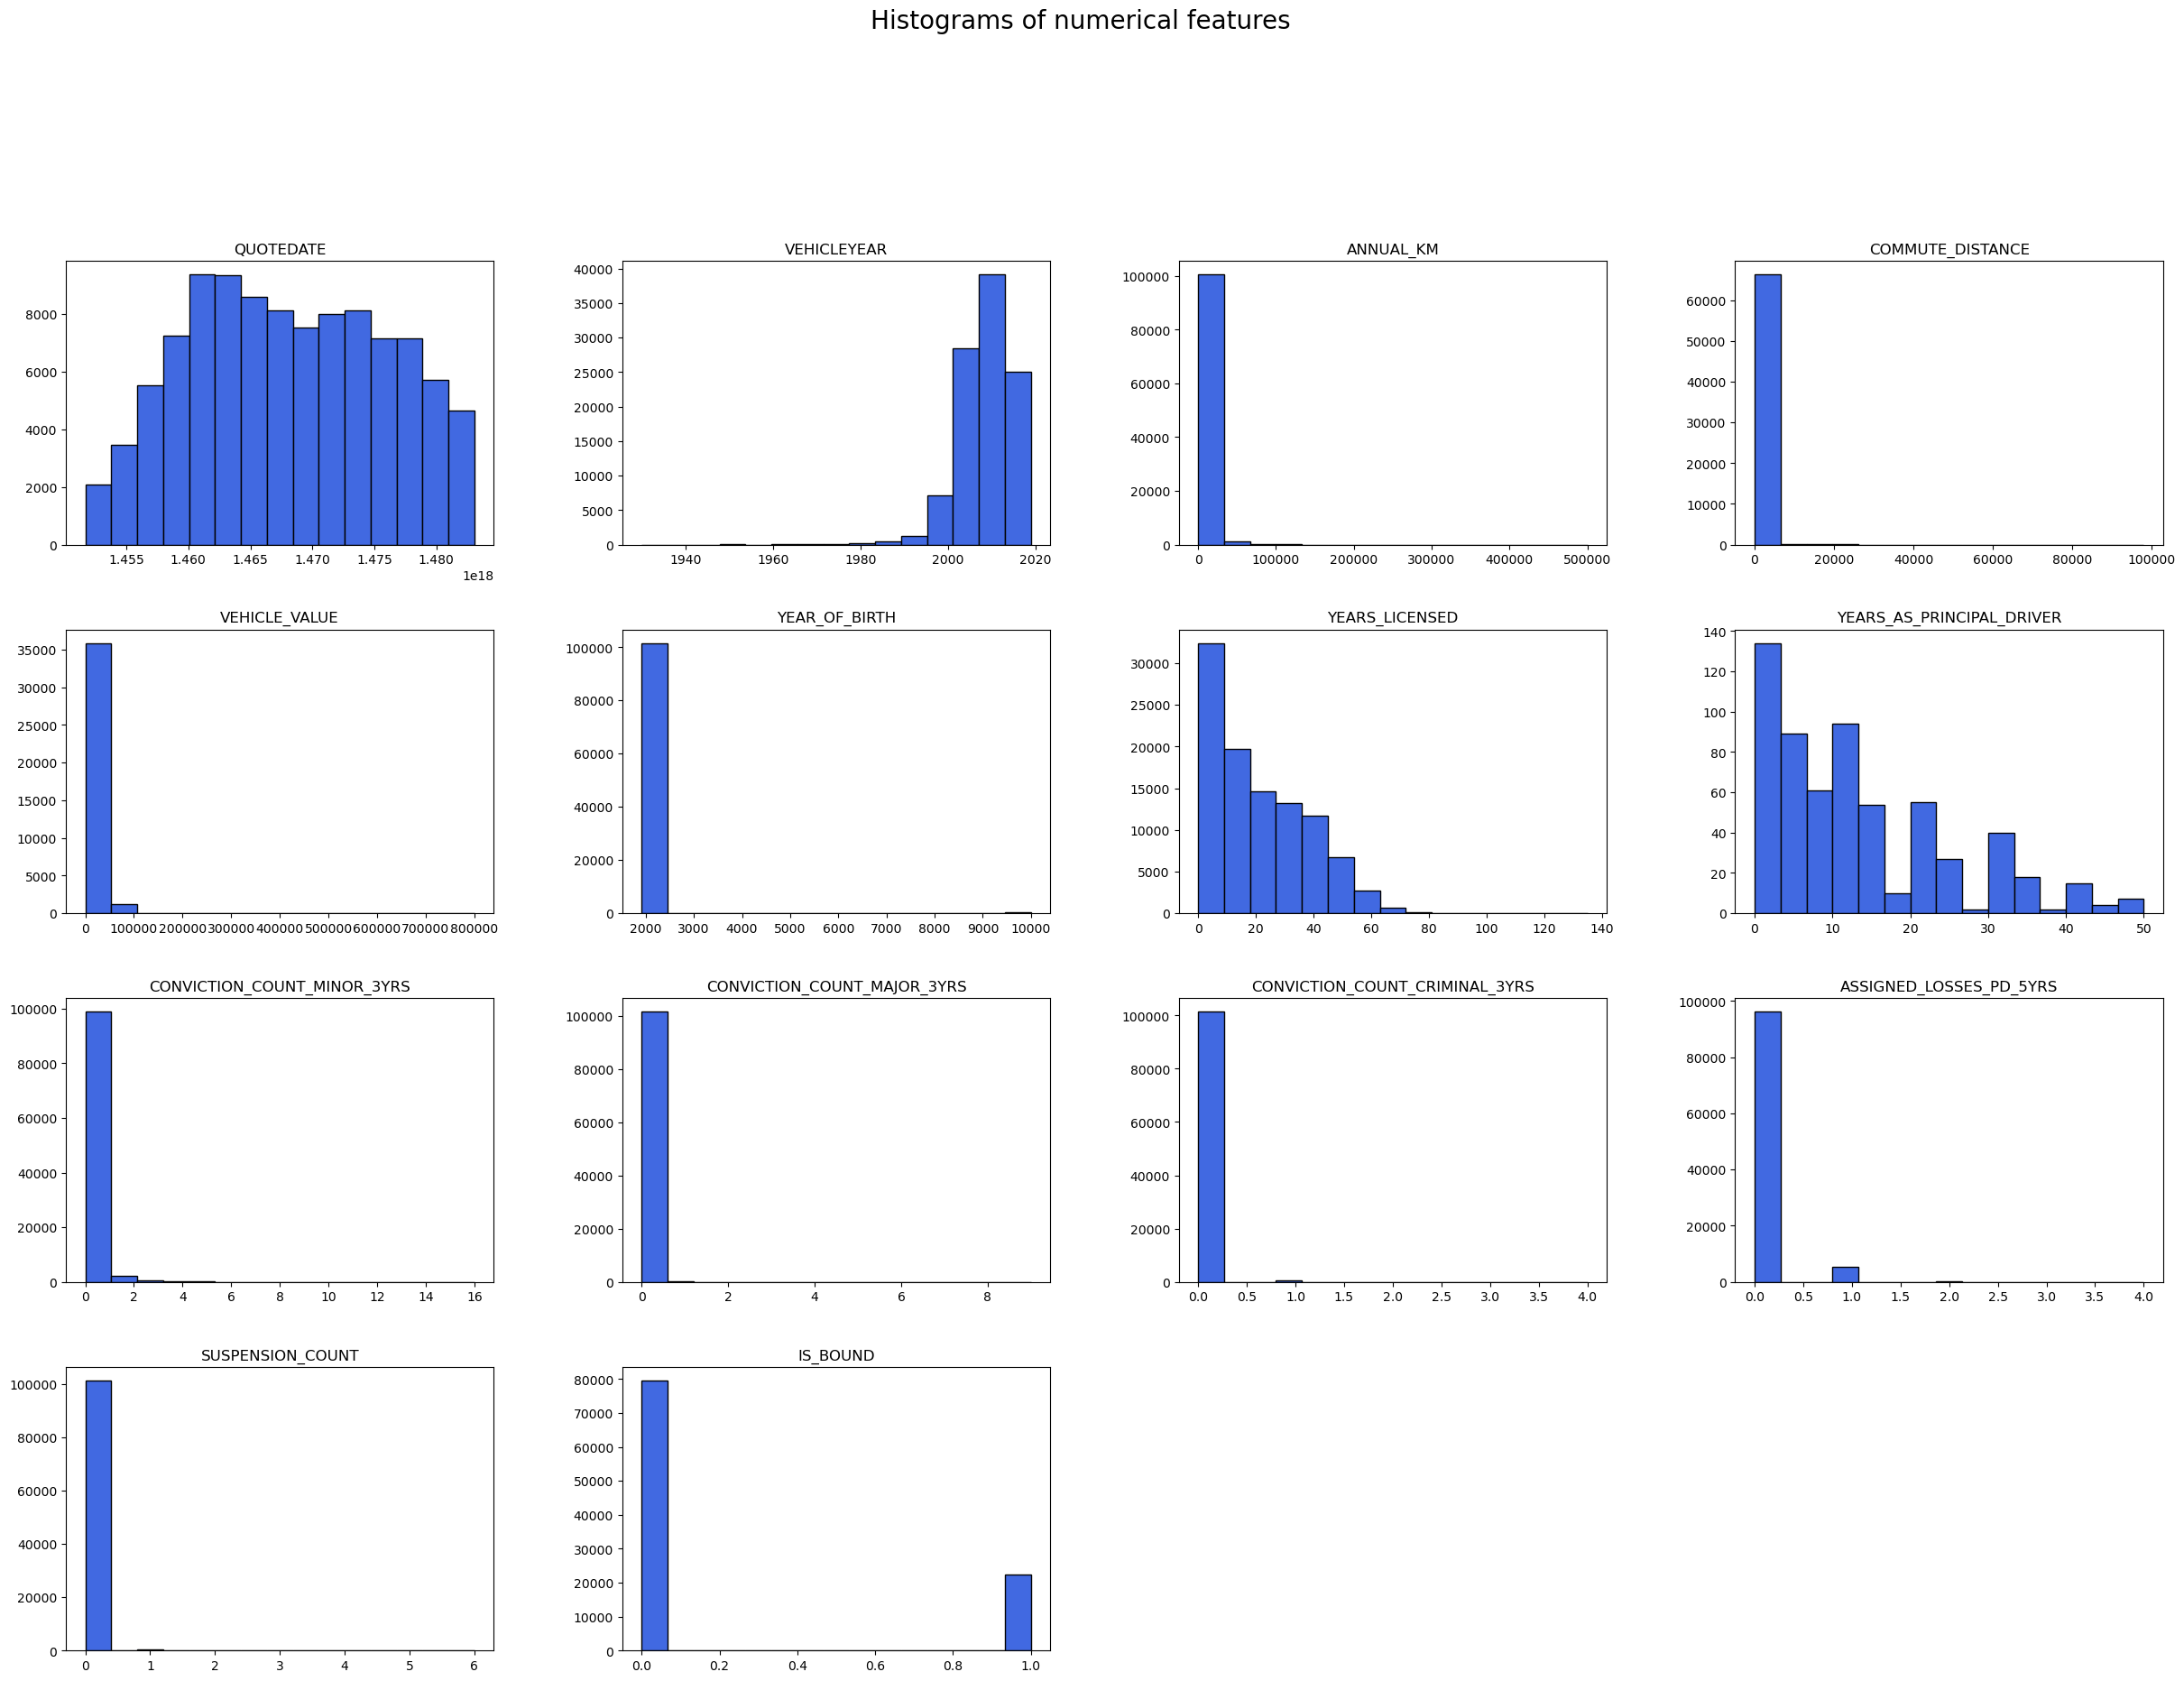

In [6]:
## Visualize dataset to gain insights (Histograms) to decide which columns needs normal distribution
## It seems the YEARS_LICENSED column need to be transformed

df.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of numerical features', x = 0.5, y = 1.02, size = 20)

In [7]:
# Function that returns the feature including null value
def checkNull(dataset):
    nullfeatures = (dataset.isnull().sum()).sort_values(ascending=False)
    nullfeatures = nullfeatures[nullfeatures>0]
    return nullfeatures

In [8]:
# Null Values
featureNan = checkNull(df)
print(featureNan)

TRACKING_SYSTEM              101887
MARKING_SYSTEM               101866
YEARS_AS_PRINCIPAL_DRIVER    101279
VEHICLE_OWNERSHIP             76450
VEHICLE_VALUE                 64673
COMMUTE_DISTANCE              35413
YEARS_LICENSED                    8
GENDER                            5
ANNUAL_KM                         1
OCCUPATION                        1
dtype: int64


##### Filling Null Values of Numerical Data for train dataset

In [9]:
df['VEHICLE_VALUE']=df['VEHICLE_VALUE'].fillna(df['VEHICLE_VALUE'].mean())
df['COMMUTE_DISTANCE']=df['COMMUTE_DISTANCE'].fillna(df['COMMUTE_DISTANCE'].mean())
df['YEARS_LICENSED']=df['YEARS_LICENSED'].fillna(df['YEARS_LICENSED'].mean())
df['ANNUAL_KM']=df['ANNUAL_KM'].fillna(df['ANNUAL_KM'].mean())

##### Filling Null Values of Qualitative Data for train dataset

In [10]:
df['VEHICLE_OWNERSHIP']=df['VEHICLE_OWNERSHIP'].fillna(df['VEHICLE_OWNERSHIP'].mode()[0])
df['GENDER']=df['GENDER'].fillna(df['GENDER'].mode()[0])
df['OCCUPATION']=df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0])

In [11]:
# Dictionary mapping patterns to vehicle makes
vehicle_make_patterns = {
    'TRUCK|CAMION': 'TRUCK_OR_CAMION',
    'CURA': 'ACURA',
    'ALFA': 'ALFAROMEO',
    ' CAT': 'ARCTICCAT',
    'BOMB': 'BOMBARDIER',
    'CADIL': 'CADILLAC',
    'CHEV|CEVROLET|CHERVOLET|CHCVIOE': 'CHEVROLET',
    'CHR|CRYSLER|CHYRSLER': 'CHRYSLER',
    'ROLLA': 'CORROLLA',
    'DODGE|DOGDE': 'DODGE',
    'FORD|1FTFW1EF8BFA01523': 'FORD',
    'HON': 'HONDA',
    'HYU|HYN|HUN': 'HYUNDAI',
    'INFIN': 'INFINITI',
    'JEEP|JEPP': 'JEEP',
    'ROVER': 'LANDROVER',
    'MERC': 'MERCEDES-BENZ',
    'MECEDEZ': 'MERCEDES-BENZ',
    'MIT': 'MITSUBISHI',
    'NIS|2XXXXXXXXXXXXXXXXXX': 'NISSAN',
    'PONT|POTIAC': 'PONTIAC',
    'POR|PROSCHE': 'PORSCHE',
    'VOLK|VOLGSWAGEN|VOLSWAGEN|VW|WV': 'VOLKSWAGEN',
    'TOY|TOTOTA': 'TOYOTA',
    'MAZDS|MAZDA': 'MAZDA',
    'SKI-DOO': 'SKIDOO',
    'ELANTRA': 'ELANTRA',
    'FOREST': 'FOREST',
    'GMC': 'GMC',
    'GRAND': 'GRAND',
    'HARLEY': 'HARLEY',
}

outliers = ['AMC', 'ARCTIC CAT', 'ALFA ROMEO', 'HIGH COUNTRY', 'RYMCO', 'NEW HOLLAND',
            'MGB', 'LEXUS CAMION/VAN', 'LADA', 'KTM', 'JOHN DEERE', 'GRAND', 'ALTIMA',
            'FREIGHTLINER', 'EL CAMINO', 'CORVETTE', 'CAMRY', 'BENTLEY TRUCK/VAN', 'ASTRO', 'SHELBY']

# Create new column with correct values
df['VEHICLEMAKE_NEW'] = df['VEHICLEMAKE']

# Iterate through the dictionary and update the VEHICLEMAKE_NEW column
for pattern, make in vehicle_make_patterns.items():
    mask = df['VEHICLEMAKE'].str.contains(pattern, case=False, na=False)
    df.loc[mask, 'VEHICLEMAKE_NEW'] = make

# Handling outliers

df['VEHICLEMAKE'] = np.where(df['VEHICLEMAKE'].isin(outliers), 'OUTLIER', df['VEHICLEMAKE_NEW'])

# Clean up
del df['VEHICLEMAKE_NEW']

print(df['VEHICLEMAKE'])

0              VOLKSWAGEN
1                 HYUNDAI
2               CHEVROLET
3                  TOYOTA
4                   HONDA
               ...       
101886             SATURN
101887              HONDA
101888    TRUCK_OR_CAMION
101889            PONTIAC
101890                GMC
Name: VEHICLEMAKE, Length: 101891, dtype: object


In [12]:
train_data_obj = df.select_dtypes(include = ['object'])
print(train_data_obj.columns)
print('\nNo. of categorical feature columns: ',len(train_data_obj.columns))

Index(['VEHICLEMAKE', 'VEHICLEMODEL', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLEUSE', 'GENDER', 'POSTAL_CODE', 'AREA_CODE',
       'MULTI_PRODUCT', 'MARITAL_STATUS', 'OCCUPATION'],
      dtype='object')

No. of categorical feature columns:  12


In [13]:
le = LabelEncoder()
df['VEHICLEMAKE'] = le.fit_transform(df['VEHICLEMAKE'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'ACURA': 0, 'ALFAROMEO': 1, 'AM GENERAL': 2, 'AMERICAN MOTORS': 3, 'ARCTICCAT': 4, 'ASTON MARTIN': 5, 'AUDI': 6, 'AUSTIN-HEALEY': 7, 'BENTLEY': 8, 'BLUE BIRD CORP': 9, 'BMW': 10, 'BOMBARDIER': 11, 'BRICKLIN': 12, 'BUICK': 13, 'CADILLAC': 14, 'CELICA': 15, 'CHALLENGER': 16, 'CHEVROLET': 17, 'CHRYSLER': 18, 'CIVIC': 19, 'COACHMEN': 20, 'COBRA - AC': 21, 'CONVERTED': 22, 'CORROLLA': 23, 'CUTLASS': 24, 'DAEWOO': 25, 'DODGE': 26, 'E350': 27, 'EAGLE': 28, 'ELANTRA': 29, 'F150': 30, 'F250': 31, 'FERRARI': 32, 'FIAT': 33, 'FORD': 34, 'FOREST': 35, 'GEO': 36, 'GMC': 37, 'GRAND': 38, 'GULF STREAM': 39, 'HARLEY': 40, 'HINO': 41, 'HONDA': 42, 'HUMMER': 43, 'HYUNDAI': 44, 'INFINITI': 45, 'INTERNATIONAL': 46, 'JAGUAR': 47, 'JEEP': 48, 'JETTA': 49, 'KABUTO': 50, 'KAISER WILLY': 51, 'KENWORTH': 52, 'KIA': 53, 'LAMBORGHINI': 54, 'LANDROVER': 55, 'LEXUS': 56, 'LINCOLN': 57, 'MADZA': 58, 'MAILBOU': 59, 'MASERATI': 60, 'MATRIX': 61, 'MAZDA': 62, 'MCLAREN': 63, 'MERCEDES-BENZ': 64, 'MG': 65, 'MGA': 66, 'M

In [14]:
le = LabelEncoder()
df['VEHICLEMODEL'] = le.fit_transform(df['VEHICLEMODEL'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'1.6EL 4DR': 0, '1.6EL PREMIUM 4DR': 1, '1.6EL SE 4DR': 2, '1.6EL SPORT 4DR': 3, '1.7EL LIMITED 4DR': 4, '1.7EL PREMIUM 4DR': 5, '1.7EL PREMIUM 4P': 6, '1.7EL TOURING 4DR': 7, '1.7EL TOURING 4P': 8, '128I 2DR': 9, '128I CABRIOLET': 10, '128i 2DR': 11, '128i CABRIOLET': 12, '135I 2DR': 13, '135I CABRIOLET': 14, '135i 2DR': 15, '135i CABRIOLET': 16, '150': 17, '1500': 18, '1500 PICKUP': 19, '1500 QUAD CAB': 20, '1500 QUAD CAB 4WD': 21, '1500 SERIES': 22, '1500 SPORT CREW CAB': 23, '180SX': 24, '185': 25, '190D 4DR': 26, '190E 2.6 4DR': 27, '190E 4DR': 28, '2 DOOR': 29, '2 DR': 30, '2 TON': 31, '2.2CL 2DR': 32, '2.3CL 2DR': 33, '2.5': 34, '2.5TL 4DR': 35, '200': 36, '200 C 4DR': 37, '200 C V6 4DR': 38, '200 C V6 4DR AWD': 39, '200 LIMITED 4DR': 40, '200 LIMITED V6 4DR': 41, '200 LIMITED V6 CONVERTIBLE': 42, '200 LX 4DR': 43, '200 LX CONVERTIBLE': 44, '200 S 4DR': 45, '200 S V6 4DR': 46, '200 S V6 4DR AWD': 47, '200 TOURING 4DR': 48, '200 TOURING CONVERTIBLE': 49, '200 TOURING V6 4DR': 50

In [15]:
le = LabelEncoder()
df['VEHICLE_OWNERSHIP'] = le.fit_transform(df['VEHICLE_OWNERSHIP'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Leased': 0, 'Non-owned': 1, 'Owned': 2}


In [16]:
le = LabelEncoder()
df['VEHICLEUSE'] = le.fit_transform(df['VEHICLEUSE'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Business': 0, 'Commute': 1, 'Courtesy Car': 2, 'Driver Training': 3, 'Farm Pleasure': 4, 'Fire Department -  Non-Emergency': 5, 'Fisherman': 6, 'Pleasure': 7, 'Police Emergency/Patrol': 8, 'Rally': 9}


In [17]:
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Female': 0, 'Male': 1, 'Unknown': 2}


In [18]:
le = LabelEncoder()
df['POSTAL_CODE'] = le.fit_transform(df['POSTAL_CODE'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'115': 0, '145': 1, '151': 2, '200': 3, '215': 4, '276': 5, '350': 6, '381': 7, '406': 8, '481': 9, '483': 10, '495': 11, '496': 12, '595': 13, '623': 14, '745': 15, '808': 16, '882': 17, '891': 18, '945': 19, '975': 20, 'A0A': 21, 'A0B': 22, 'A0C': 23, 'A0E': 24, 'A0G': 25, 'A0H': 26, 'A0J': 27, 'A0K': 28, 'A0L': 29, 'A0M': 30, 'A0N': 31, 'A0P': 32, 'A0R': 33, 'A0W': 34, 'A1A': 35, 'A1B': 36, 'A1C': 37, 'A1E': 38, 'A1G': 39, 'A1H': 40, 'A1K': 41, 'A1L': 42, 'A1M': 43, 'A1N': 44, 'A1S': 45, 'A1V': 46, 'A1W': 47, 'A1X': 48, 'A1Y': 49, 'A2A': 50, 'A2B': 51, 'A2H': 52, 'A2N': 53, 'A2V': 54, 'A5A': 55, 'A8A': 56, 'B0C': 57, 'B0E': 58, 'B0H': 59, 'B0J': 60, 'B0K': 61, 'B0L': 62, 'B0M': 63, 'B0N': 64, 'B0P': 65, 'B0R': 66, 'B0S': 67, 'B0T': 68, 'B0V': 69, 'B0W': 70, 'B1A': 71, 'B1B': 72, 'B1C': 73, 'B1E': 74, 'B1G': 75, 'B1H': 76, 'B1J': 77, 'B1K': 78, 'B1L': 79, 'B1M': 80, 'B1N': 81, 'B1P': 82, 'B1R': 83, 'B1S': 84, 'B1T': 85, 'B1V': 86, 'B1W': 87, 'B1X': 88, 'B1Y': 89, 'B2A': 90, 'B2C': 9

In [19]:
le = LabelEncoder()
df['MULTI_PRODUCT'] = le.fit_transform(df['MULTI_PRODUCT'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'No': 0, 'Yes': 1}


In [20]:
le = LabelEncoder()
df['MARITAL_STATUS'] = le.fit_transform(df['MARITAL_STATUS'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Divorced': 0, 'Married': 1, 'Separated': 2, 'Single': 3, 'Unknown': 4, 'Widow/Widower': 5}


In [21]:
le = LabelEncoder()
df['OCCUPATION'] = le.fit_transform(df['OCCUPATION'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Farm/Fisher': 0, 'Government ': 1, 'Homemaker': 2, 'Insurance': 3, 'Labour/Plant': 4, 'Management/Administration': 5, 'Military': 6, 'Not Known': 7, 'Office/Stores': 8, 'Professional/Health': 9, 'Professional/Other': 10, 'Professional/Social': 11, 'Retired': 12, 'Sales': 13, 'Service Work': 14, 'Student': 15, 'Trades': 16, 'Tradesman': 17, 'Unemployed': 18}


In [22]:
df_test =  pd.read_excel('Cooperators_Quotes_Dataset_Test.xlsx')
df_test['QUOTEDATE'] = pd.to_numeric(df['QUOTEDATE'])
df_test['VEHICLEMODEL'] = df_test['VEHICLEMODEL'].astype(str)

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   QUOTEDATE                    15114 non-null  int64  
 1   VEHICLEYEAR                  15114 non-null  int64  
 2   VEHICLEMAKE                  15114 non-null  object 
 3   VEHICLEMODEL                 15114 non-null  object 
 4   ANNUALKM                     15114 non-null  int64  
 5   COMMUTEDISTANCE              9923 non-null   float64
 6   MARKINGSYSTEM                19 non-null     object 
 7   TRACKINGSYSTEM               2 non-null      object 
 8   VEHICLEOWNERSHIP             3614 non-null   object 
 9   VEHICLEVALUE                 4955 non-null   float64
 10  VEHICLEUSE                   15114 non-null  object 
 11  GENDER                       15114 non-null  object 
 12  YEAROFBIRTH                  15114 non-null  int64  
 13  POSTALCODE      

In [24]:
test_feature_Nan = checkNull(df_test)
print(test_feature_Nan)

TRACKINGSYSTEM            15112
MARKINGSYSTEM             15095
YEARSASPRINCIPALDRIVER    14946
VEHICLEOWNERSHIP          11500
VEHICLEVALUE              10159
COMMUTEDISTANCE            5191
YEARSLICENSED                 3
dtype: int64


##### Filling Null Values of Numerical Data for test dataset

In [25]:
df_test['VEHICLEVALUE']=df_test['VEHICLEVALUE'].fillna(df_test['VEHICLEVALUE'].mean())
df_test['COMMUTEDISTANCE']=df_test['COMMUTEDISTANCE'].fillna(df_test['COMMUTEDISTANCE'].mean())
df_test['YEARSLICENSED']=df_test['YEARSLICENSED'].fillna(df_test['YEARSLICENSED'].mean())

In [26]:
# Dictionary mapping patterns to vehicle makes
vehicle_make_patterns = {
    'TRUCK|CAMION': 'TRUCK_OR_CAMION',
    'CURA': 'ACURA',
    'ALFA': 'ALFAROMEO',
    ' CAT': 'ARCTICCAT',
    'BOMB': 'BOMBARDIER',
    'CADIL': 'CADILLAC',
    'CHEV|CEVROLET|CHERVOLET|CHCVIOE': 'CHEVROLET',
    'CHR|CRYSLER|CHYRSLER': 'CHRYSLER',
    'ROLLA': 'CORROLLA',
    'DODGE|DOGDE': 'DODGE',
    'FORD|1FTFW1EF8BFA01523': 'FORD',
    'HON': 'HONDA',
    'HYU|HYN|HUN': 'HYUNDAI',
    'INFIN': 'INFINITI',
    'JEEP|JEPP': 'JEEP',
    'ROVER': 'LANDROVER',
    'MERC': 'MERCEDES-BENZ',
    'MECEDEZ': 'MERCEDES-BENZ',
    'MIT': 'MITSUBISHI',
    'NIS|2XXXXXXXXXXXXXXXXXX': 'NISSAN',
    'PONT|POTIAC': 'PONTIAC',
    'POR|PROSCHE': 'PORSCHE',
    'VOLK|VOLGSWAGEN|VOLSWAGEN|VW|WV': 'VOLKSWAGEN',
    'TOY|TOTOTA': 'TOYOTA',
    'MAZDS|MAZDA': 'MAZDA',
    'SKI-DOO': 'SKIDOO',
    'ELANTRA': 'ELANTRA',
    'FOREST': 'FOREST',
    'GMC': 'GMC',
    'GRAND': 'GRAND',
    'HARLEY': 'HARLEY',
}

outliers = ['AMC', 'ARCTIC CAT', 'ALFA ROMEO', 'HIGH COUNTRY', 'RYMCO', 'NEW HOLLAND',
            'MGB', 'LEXUS CAMION/VAN', 'LADA', 'KTM', 'JOHN DEERE', 'GRAND', 'ALTIMA',
            'FREIGHTLINER', 'EL CAMINO', 'CORVETTE', 'CAMRY', 'BENTLEY TRUCK/VAN', 'ASTRO', 'SHELBY']

# Create new column with correct values
df_test['VEHICLEMAKE_NEW'] = df_test['VEHICLEMAKE']

# Iterate through the dictionary and update the VEHICLEMAKE_NEW column
for pattern, make in vehicle_make_patterns.items():
    mask = df_test['VEHICLEMAKE'].str.contains(pattern, case=False, na=False)
    df_test.loc[mask, 'VEHICLEMAKE_NEW'] = make

# Handling outliers

df_test['VEHICLEMAKE'] = np.where(df_test['VEHICLEMAKE'].isin(outliers), 'OUTLIER', df_test['VEHICLEMAKE_NEW'])

# Clean up
del df_test['VEHICLEMAKE_NEW']

print(df_test['VEHICLEMAKE'])

0          HONDA
1           FORD
2          DODGE
3          DODGE
4           FORD
          ...   
15109      HONDA
15110        BMW
15111      HONDA
15112      HONDA
15113    HYUNDAI
Name: VEHICLEMAKE, Length: 15114, dtype: object


In [27]:
le = LabelEncoder()
df_test['VEHICLEMAKE'] = le.fit_transform(df_test['VEHICLEMAKE'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'ACURA': 0, 'AM GENERAL': 1, 'ASTON MARTIN': 2, 'AUDI': 3, 'BENTLEY': 4, 'BMW': 5, 'BUICK': 6, 'CADILLAC': 7, 'CAR': 8, 'CHALLENGER': 9, 'CHEVROLET': 10, 'CHRYSLER': 11, 'CIVIC': 12, 'DATSUN': 13, 'DIABLO': 14, 'DIHATSU': 15, 'DODDGE': 16, 'DODGE': 17, 'FIAT': 18, 'FISKER': 19, 'FORD': 20, 'GMC': 21, 'HONDA': 22, 'HUMMER': 23, 'HYUNDAI': 24, 'INFINITI': 25, 'INTERNATIONAL': 26, 'JAGUAR': 27, 'JEEP': 28, 'KIA': 29, 'LANDROVER': 30, 'LEXUS': 31, 'LINCOLN': 32, 'MASERATI': 33, 'MAZDA': 34, 'MAZERATI': 35, 'MCLAREN': 36, 'MERCEDES-BENZ': 37, 'MERZ': 38, 'MINI': 39, 'MINI COOPER': 40, 'MITSUBISHI': 41, 'MONICO': 42, 'NISSAN': 43, 'OLDSMOBILE': 44, 'OUTLIER': 45, 'PLYMONTH': 46, 'PLYMOUTH': 47, 'PONITAC': 48, 'PONTIAC': 49, 'PORSCHE': 50, 'ROLLS ROYCE': 51, 'ROYAL': 52, 'SAAB': 53, 'SATURN': 54, 'SCION': 55, 'SMART': 56, 'SUBARU': 57, 'SUZUKI': 58, 'TESLA': 59, 'TOYOTA': 60, 'TRUCK_OR_CAMION': 61, 'UNITED': 62, 'VOLKSWAGEN': 63, 'VOLLKS': 64, 'VOLVO': 65, 'YAMAHA': 66}


In [28]:
le = LabelEncoder()
df_test['VEHICLEMODEL'] = le.fit_transform(df_test['VEHICLEMODEL'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'1.6EL 4DR': 0, '1.6EL SE 4DR': 1, '1.6EL SPORT 4DR': 2, '1.7EL LIMITED 4DR': 3, '1.7EL PREMIUM 4DR': 4, '1.7EL TOURING 4DR': 5, '124 ABARTH SPIDER': 6, '128I 2DR': 7, '128I CABRIOLET': 8, '135I CABRIOLET': 9, '1500': 10, '200 C 4DR': 11, '200 C V6 4DR': 12, '200 LIMITED 4DR': 13, '200 LIMITED V6 4DR': 14, '200 LIMITED V6 CONVERTIBLE': 15, '200 LX 4DR': 16, '200 LX V6 4DR': 17, '200 S V6 4DR': 18, '200 TOURING 4DR': 19, '200 TOURING V6 4DR': 20, '200 TOURING V6 CONVERTIBLE': 21, '240 4DR': 22, '240SX 2DR': 23, '245 WAGON': 24, '2500': 25, '280Z': 26, '3.2TL 4DR': 27, '3.5RL 4DR': 28, '300 4DR': 29, '300 4DR AWD': 30, '300 LIMITED 4DR': 31, '300 LIMITED 4DR AWD': 32, '300 LX 4DR': 33, '300 S 4DR': 34, '300 S 4DR AWD': 35, '300 TOURING 4DR': 36, '300 TOURING 4DR AWD': 37, '300C 4DR': 38, '300C 4DR AWD': 39, '300CD 2DR': 40, '300D 2.5': 41, '300D 2.5 TURBO 4DR': 42, '300M 4DR': 43, '300M SPECIAL 4DR': 44, '300ZX GL 2+2 2DR COUPE': 45, '320I 4DR': 46, '320I XDRIVE 4DR AWD': 47, '320i 4DR'

In [29]:
le = LabelEncoder()
df_test['VEHICLEOWNERSHIP'] = le.fit_transform(df_test['VEHICLEOWNERSHIP'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Leased': 0, 'Non-owned': 1, 'Owned': 2, nan: 3}


In [30]:
le = LabelEncoder()
df_test['VEHICLEUSE'] = le.fit_transform(df_test['VEHICLEUSE'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Business': 0, 'Commute': 1, 'Courtesy Car': 2, 'Driver Training': 3, 'Farm Pleasure': 4, 'Fire Department - Emergency': 5, 'Pleasure': 6}


In [31]:
le = LabelEncoder()
df_test['GENDER'] = le.fit_transform(df_test['GENDER'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Female': 0, 'Male': 1}


In [32]:
le = LabelEncoder()
df_test['POSTALCODE'] = le.fit_transform(df_test['POSTALCODE'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'207': 0, '786': 1, '911': 2, '947': 3, 'A0A': 4, 'A0B': 5, 'A0C': 6, 'A0E': 7, 'A0G': 8, 'A0H': 9, 'A0J': 10, 'A0K': 11, 'A0L': 12, 'A0M': 13, 'A0N': 14, 'A0P': 15, 'A0R': 16, 'A1A': 17, 'A1B': 18, 'A1C': 19, 'A1E': 20, 'A1G': 21, 'A1H': 22, 'A1K': 23, 'A1L': 24, 'A1M': 25, 'A1N': 26, 'A1S': 27, 'A1V': 28, 'A1W': 29, 'A1X': 30, 'A1Y': 31, 'A2A': 32, 'A2B': 33, 'A2H': 34, 'A2N': 35, 'A2V': 36, 'A5A': 37, 'A8A': 38, 'B0C': 39, 'B0E': 40, 'B0H': 41, 'B0J': 42, 'B0K': 43, 'B0L': 44, 'B0M': 45, 'B0N': 46, 'B0P': 47, 'B0R': 48, 'B0S': 49, 'B0T': 50, 'B0V': 51, 'B0W': 52, 'B1A': 53, 'B1C': 54, 'B1G': 55, 'B1H': 56, 'B1J': 57, 'B1K': 58, 'B1L': 59, 'B1M': 60, 'B1N': 61, 'B1P': 62, 'B1R': 63, 'B1S': 64, 'B1V': 65, 'B1W': 66, 'B1Y': 67, 'B2A': 68, 'B2G': 69, 'B2H': 70, 'B2N': 71, 'B2S': 72, 'B2T': 73, 'B2V': 74, 'B2W': 75, 'B2X': 76, 'B2Y': 77, 'B2Z': 78, 'B3A': 79, 'B3B': 80, 'B3E': 81, 'B3G': 82, 'B3H': 83, 'B3J': 84, 'B3K': 85, 'B3L': 86, 'B3M': 87, 'B3N': 88, 'B3P': 89, 'B3R': 90, 'B3S': 9

In [33]:
le = LabelEncoder()
df_test['MULTIPRODUCT'] = le.fit_transform(df_test['MULTIPRODUCT'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'No': 0, 'Yes': 1}


In [34]:
le = LabelEncoder()
df_test['MARITALSTATUS'] = le.fit_transform(df_test['MARITALSTATUS'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Divorced': 0, 'Married': 1, 'Separated': 2, 'Single': 3, 'Unknown': 4, 'Widow/Widower': 5}


In [35]:
le = LabelEncoder()
df_test['OCCUPATION'] = le.fit_transform(df_test['OCCUPATION'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Farm/Fisher': 0, 'Government ': 1, 'Homemaker': 2, 'Insurance': 3, 'Labour/Plant': 4, 'Management/Administration': 5, 'Military': 6, 'Not Known': 7, 'Office/Stores': 8, 'Professional/Health': 9, 'Professional/Other': 10, 'Professional/Social': 11, 'Retired': 12, 'Sales': 13, 'Service Work': 14, 'Student': 15, 'Trades': 16, 'Unemployed': 17}


In [36]:
df_test_data = df_test.drop(['MARKINGSYSTEM', 'TRACKINGSYSTEM', 'YEARSASPRINCIPALDRIVER', 'AREACODE', 'POSTALCODE'], axis =1)

In [37]:
df_train_data = df.drop(['MARKING_SYSTEM', 'TRACKING_SYSTEM', 'YEARS_AS_PRINCIPAL_DRIVER', 'AREA_CODE', 'POSTAL_CODE', 'IS_BOUND'], axis =1)

In [38]:
df_train_data.columns = [col.replace('_', '') for col in df_train_data.columns]

In [39]:
df_train_data_X = df_train_data
df_train_data_y = df['IS_BOUND']

## Modelling with Bayesian (Naive Bayes) based method:

At this point, the training data was split into training and validation sets using the train_test_split() method from model_selection in scikit learn. Here, 'X_train' and 'y_train' are the feature matrix and target variable for the training set, that are used as the machine learning model to train the data. Furthermore, to evaluate the performance of your trained model 'X_test' and 'y_test' are the the feature matrix and target variable for the validation set.

To ensure the data was split in the same way while running the code multiple times and get a consistent result the 'random_state' parameter value was fixed to 42.

The 'test_size' argument mainly specifies the percentage of data allocated for the validation set. The model's performance evaluation depends on this value as the percentage of data used for training and testing could be the reason for overfitting, underfitting, hyperparameter tuning, bias analysis, etc. In this case, the 'test_size' value was 0.2 (20%).

There was inconsistency in the sample size of train and test data. That's why, both the datasets were aligned by inner join using align() method.

After fitting the model the predicted values for the feature matrix-based target variable were stored in 'y_pred_proba_nb'. This was done using the GaussianNB() method from linear_model in the scikit learn library. Here, the predict_proba() method was used for predicting the probability of the positive class.

The ROC curve for Naive Bayes was calculated using the roc_curve() method and the AUC score by auc() method. The AUC score is 0.5024382224998044 in this case. The Accuracy for Naive Bayes is 78%. The Classification Report and Confusion Matrix are showing the detailed evaluation of model.

As a final step, the roc curve was plotted in the graph implementing false positive against true positive rate.

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train_data_X, df_train_data_y, test_size=0.2, random_state=42)

In [41]:
# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [42]:
# Align columns in X_train and X_test
X_train, df_test_data = X_train.align(X_test, axis=1, join='inner')

In [43]:
# Predict on the test set
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1] # Probability of the positive class
print(y_pred_proba_nb)

[0.22068563 0.22073439 0.22054945 ... 0.22005135 0.21615276 0.21886978]


In [44]:
list_predictions = nb_model.predict(df_train_data_X)
rounded_list_predictions = [x for x in list_predictions]
print(rounded_list_predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [45]:
# Calculate ROC curve and AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
print('ROC AUC Score =', roc_auc_nb)

y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed evaluation
print('\nClassification Report:')
print(classification_report(y_test, y_pred_nb))


ROC AUC Score = 0.5024401892289505
Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15925
           1       0.00      0.00      0.00      4454

    accuracy                           0.78     20379
   macro avg       0.39      0.50      0.44     20379
weighted avg       0.61      0.78      0.69     20379



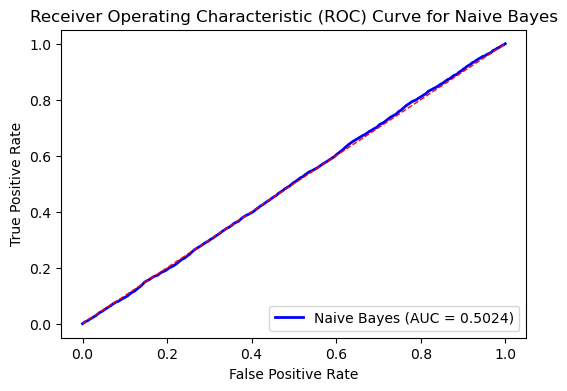

Confusion Matrix:
[[15925     0]
 [ 4454     0]]


In [46]:
# Plot the ROC curve
plt.figure(figsize=(6,4))
roc_nb = plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(cm)

## Modelling with Logistic Regression:

In a similar process, the training data was split into training and validation sets that were used for the Bayesian-based method.

Again after fitting the model, the predicted values for the feature matrix-based target variable were stored in 'y_pred_proba_lr'. This was done using the LogisticRegression() method from linear_model in the scikit learn library. Here, the predict_proba() method was used as well for predicting the probability of the positive class.

The ROC curve for Logistic Regression was calculated using the roc_curve() method and the AUC score by the roc_auc_score() method. The AUC score is 0.5 in this case. The Accuracy for Logistic Regression Model is 78%. The Classification Report and Confusion Matrix are showing the detailed evaluation of model.

As a final step, the roc curve was plotted in the graph implementing false positive against true positive rate .

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_train_data_X, df_train_data_y, test_size= 0.2, random_state=42)

lr_model= LogisticRegression(fit_intercept=True, C=1e9)
lr_model.fit(X_train,y_train)

# Added to ignore the warnings
# warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

LogisticRegression(C=1000000000.0)

In [48]:
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1] # Probability of the positive class
print(y_pred_proba_lr)

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


In [49]:
list_predictions = lr_model.predict(df_train_data_X)
rounded_list_predictions = [x for x in list_predictions]
print(rounded_list_predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [50]:
# Calculate ROC curve
fpr_lr,tpr_lr,thresholds=roc_curve(y_test, y_pred_proba_lr)

# Calculate ROC AUC score
roc_auc_lr = auc(fpr_lr, tpr_lr)
# roc_auc_lr= roc_auc_score(y_test, y_pred_proba_lr)
print('ROC AUC Score =', roc_auc_lr)

y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report for more detailed evaluation
print('\nClassification Report:')
print(classification_report(y_test, y_pred_lr))

# Added to ignore the warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

ROC AUC Score = 0.5
Accuracy: 0.7814

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15925
           1       0.00      0.00      0.00      4454

    accuracy                           0.78     20379
   macro avg       0.39      0.50      0.44     20379
weighted avg       0.61      0.78      0.69     20379



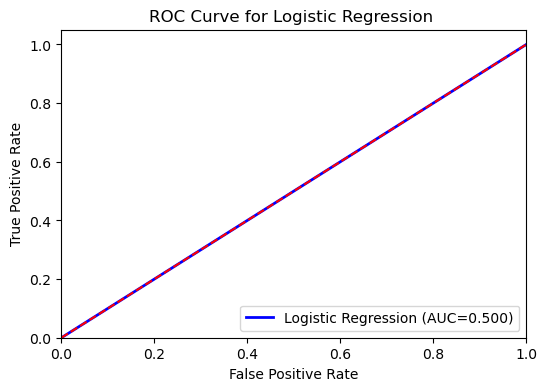

Confusion Matrix:
[[15925     0]
 [ 4454     0]]


In [51]:
# Plot ROC curve
plt.figure(figsize=(6,4))
roc_lr = plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC={roc_auc_lr:.3f})')
plt.plot([0,1],[0,1],color='red', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression ')
plt.legend(loc='lower right')
plt.show()

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm)

## Comparing the methods by looking at ROC curves:

The training data was fitted with two models: the Logistic Regression model (LogisticRegression) and the Naive Bayes model (GaussianNB).

Using the predict_proba() function for both models, the predicted probabilities for the positive class were obtained.

For both Naive Bayes and Logistic Regression, the ROC curves were computed and plotted.

Each model's performance is measured using the AUC (Area Under the Curve) measurements.

The AUC score for Naive Bayes and Logistic Regression Model is 0.5024 and 0.50 respectively. Furthermore, both model have the same accuracy of 78%.

As a result, both curve are compared and plotted for showing the same final result.

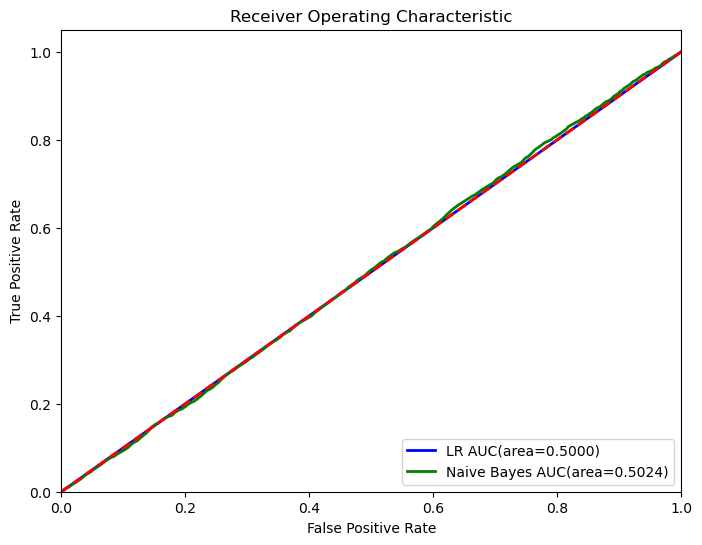

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot both ROC curves on the same graph
plt.figure(figsize=(8, 6))

# Plot ROC curve for Logistic Regression model
plt.plot(roc_lr[0].get_xdata(), roc_lr[0].get_ydata(), color='blue', lw=2, label='LR AUC(area={:.4f})'.format(auc(roc_lr[0].get_xdata(), roc_lr[0].get_ydata())))

# Plot ROC curve for Gaussian Naive Bayes model
plt.plot(roc_nb[0].get_xdata(), roc_nb[0].get_ydata(), color='green', lw=2, label='Naive Bayes AUC(area={:.4f})'.format(auc(roc_nb[0].get_xdata(), roc_nb[0].get_ydata())))

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()


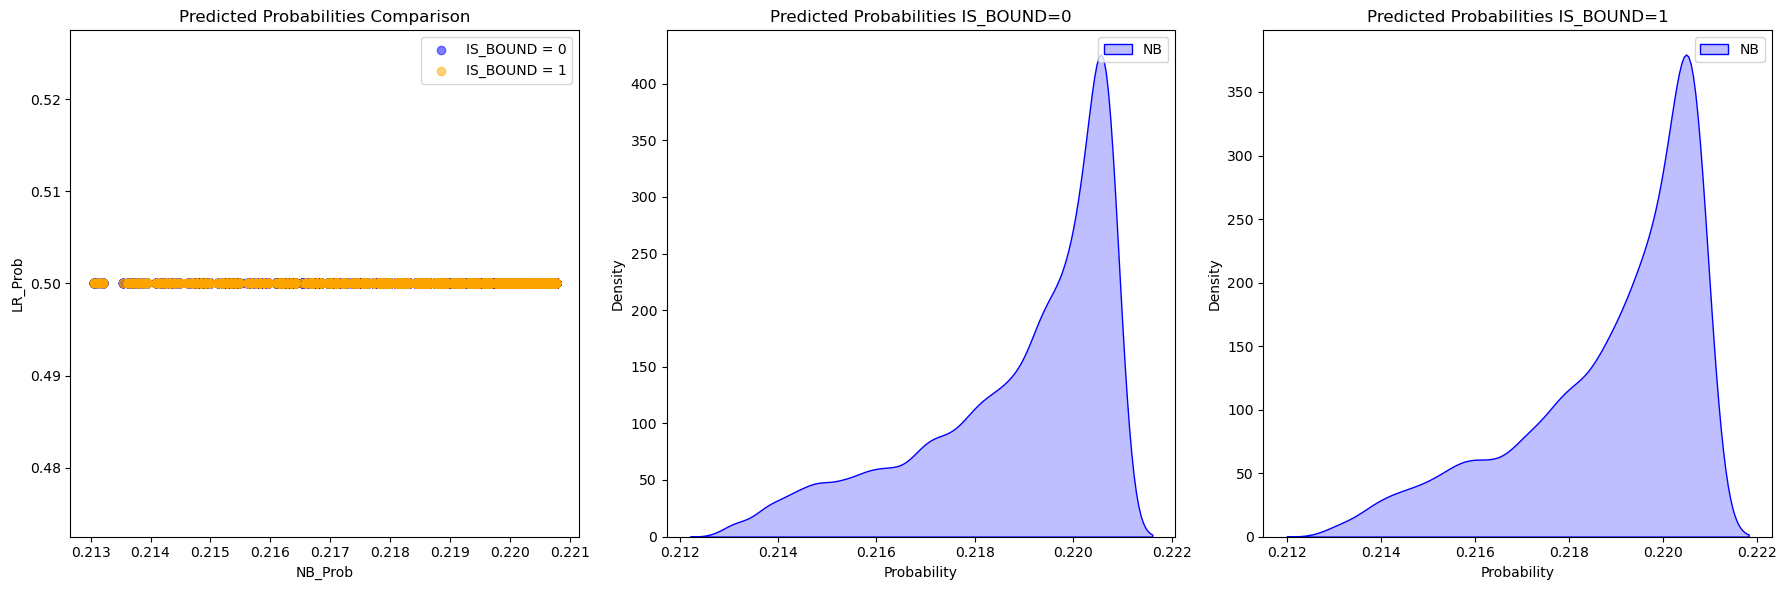

In [53]:
# Create a scatter plot for both models
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_pred_proba_nb[y_test == 0], y_pred_proba_lr[y_test == 0], c='blue', label='IS_BOUND = 0', alpha=0.5)
plt.scatter(y_pred_proba_nb[y_test == 1], y_pred_proba_lr[y_test == 1], c='orange', label='IS_BOUND = 1', alpha=0.5)
plt.xlabel('NB_Prob')
plt.ylabel('LR_Prob')
plt.title('Predicted Probabilities Comparison')
plt.legend()

# Plot bell curve for NB vs LR when IS_BOUND = 0
plt.subplot(1, 3, 2)
sns.kdeplot(y_pred_proba_nb[y_test == 0], color='blue', label='NB', fill=True)
sns.kdeplot(y_pred_proba_lr[y_test == 0], color='orange', label='LR', fill=True)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Predicted Probabilities IS_BOUND=0')
plt.legend()

# Plot bell curve for NB vs LR when IS_BOUND = 1
plt.subplot(1, 3, 3)
sns.kdeplot(y_pred_proba_nb[y_test == 1], color='blue', label='NB', fill=True)
sns.kdeplot(y_pred_proba_lr[y_test == 1], color='orange', label='LR', fill=True)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Predicted Probabilities IS_BOUND=1')
plt.legend()

plt.tight_layout()
plt.show()

# Added to ignore the warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")